## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.svm import *
from sklearn.model_selection import *
from sklearn.decomposition import *
from sklearn.linear_model import *
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import warnings
warnings.filterwarnings('ignore')

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
df = pd.read_csv('../data/wdbc.data', names=['ID','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave_pts','mean_symmetry','mean_fractal_dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave_pts','SE_symmetry','SE_fractal_dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave_pts','worst_symmetry','worst_fractal_dimension'])

In [ ]:
df['diagnosis']=df['diagnosis'].replace('M',1)
df['diagnosis']=df['diagnosis'].replace('B',0)

In [ ]:
df = df.sort_values(by='diagnosis',ignore_index=True)

In [ ]:
df_y = df['diagnosis']
df_x = df.drop('diagnosis',axis = 1)

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Train Area under the curve


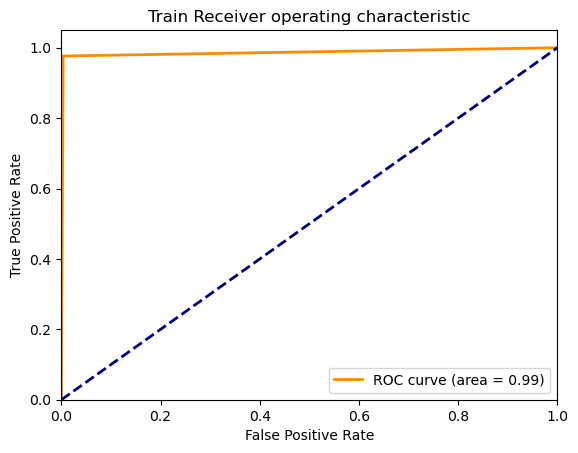

Test Area under the curve


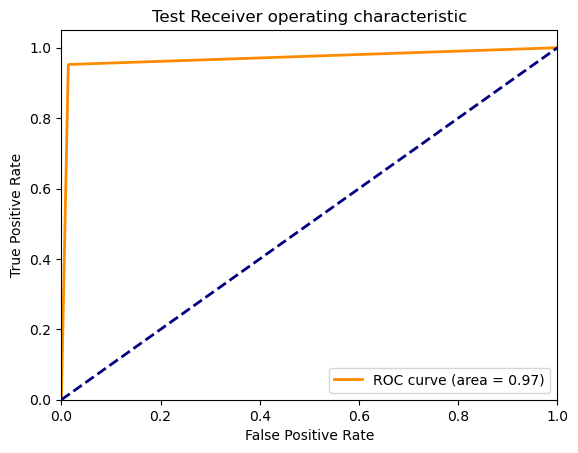

Train Confusion Matrix:
[[284   1]
 [  4 166]]
Test Confusion Matrix:
[[71  1]
 [ 2 40]]
Average Train Accuracy: 0.9853479853479854
Average Train Recall: 0.9701960784313723
Average Train Precision: 0.9904096951962241
Average Train f1: 0.9801664219700928
Average Train AUC: 0.9822910216718266
-------------------------------------
Average Test Accuracy: 0.9675438596491224
Average Test Recall: 0.9420634920634917
Average Test Precision: 0.9701623665582088
Average Test f1: 0.9552548888471033
Average Test AUC: 0.9622354497354499


In [ ]:
train_accuracy = 0
train_f1 = 0
train_recall = 0
train_auc = 0
train_precision = 0
test_accuracy = 0
test_f1 = 0
test_recall = 0
test_auc = 0
test_precision = 0
for m in range(30):
    print('Iteration',m)
    train_df_x, test_df_x, train_df_y, test_df_y = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y)
    min_max_scaler = preprocessing.MinMaxScaler().fit(train_df_x)
    train_df_x_normalized =  pd.DataFrame(min_max_scaler.transform(train_df_x))
    test_df_x_normalized = pd.DataFrame(min_max_scaler.transform(test_df_x))

    parameters = {'l1svm__C':[10**i for i in np.linspace(-2,2,num=5)]}
    l1svm_pipe = Pipeline([('l1svm', LinearSVC(penalty='l1',max_iter=80000, dual=False))])
    grid_l1svm = GridSearchCV(l1svm_pipe, parameters)
    grid_l1svm.fit(train_df_x_normalized, train_df_y)

    train_pred = grid_l1svm.best_estimator_.predict(train_df_x_normalized)
    fpr_train, tpr_train, _ = roc_curve(train_df_y,train_pred)
    train_accuracy+=accuracy_score(train_df_y,train_pred)
    train_recall+=recall_score(train_df_y,train_pred)
    train_precision+=precision_score(train_df_y,train_pred)
    train_f1+=f1_score(train_df_y,train_pred)
    train_auc+=auc(fpr_train,tpr_train)

    test_pred = grid_l1svm.best_estimator_.predict(test_df_x_normalized)
    fpr_test, tpr_test, _ = roc_curve(test_df_y,test_pred)
    test_accuracy+=accuracy_score(test_df_y,test_pred)
    test_recall+=recall_score(test_df_y,test_pred)
    test_precision+=precision_score(test_df_y,test_pred)
    test_f1+=f1_score(test_df_y,test_pred)
    test_auc+=auc(fpr_test,tpr_test)

    if m==29:
        print("Train Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_train, tpr_train, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Train Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Test Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_test, tpr_test, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_test, tpr_test))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        train_cm = confusion_matrix(train_df_y, train_pred)
        test_cm = confusion_matrix(test_df_y, test_pred)
        print('Train Confusion Matrix:')
        print(train_cm)
        print('Test Confusion Matrix:')
        print(test_cm)

print("Average Train Accuracy:", train_accuracy/30)
print("Average Train Recall:", train_recall/30)
print("Average Train Precision:", train_precision/30)
print("Average Train f1:", train_f1/30)
print("Average Train AUC:", train_auc/30)
print("-------------------------------------")
print("Average Test Accuracy:", test_accuracy/30)
print("Average Test Recall:", test_recall/30)
print("Average Test Precision:", test_precision/30)
print("Average Test f1:", test_f1/30)
print("Average Test AUC:", test_auc/30)

#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

##### (B)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Train Area under the curve


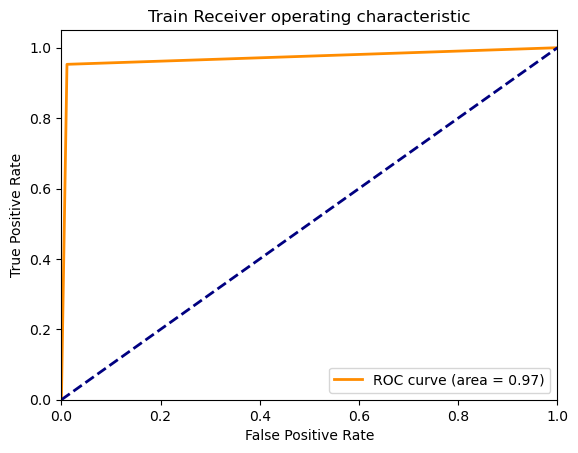

Test Area under the curve


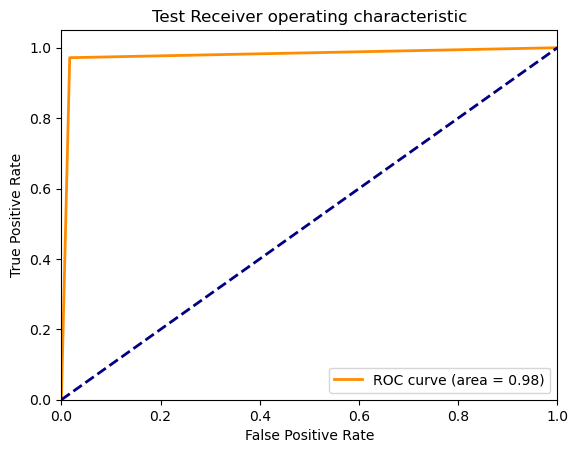

Train confusion matrix
[[176   2]
 [  5 101]]
Test confusion matrix
[[176   3]
 [  3 103]]
Average Train Accuracy: 0.987676056338028
Average Train Recall: 0.9723270440251576
Average Train Precision: 0.9945301340501307
Average Train f1: 0.9832024158027391
Average Train AUC: 0.984571761712953
-------------------------------------
Average Test Accuracy: 0.9622222222222223
Average Test Recall: 0.9349056603773586
Average Test Precision: 0.963247364425334
Average Test f1: 0.9483201841019362
Average Test AUC: 0.9566520853097222


In [ ]:
train_accuracy = 0
train_f1 = 0
train_recall = 0
train_auc = 0
train_precision = 0
test_accuracy = 0
test_f1 = 0
test_recall = 0
test_auc = 0
test_precision = 0

for m in range(30):
    print('Iteration',m)
    train_df_x, test_df_x, train_df_y, test_df_y = train_test_split(df_x, df_y, test_size=0.5, stratify=df_y)
    min_max_scaler = preprocessing.MinMaxScaler().fit(train_df_x)
    train_df_x_normalized =  pd.DataFrame(min_max_scaler.transform(train_df_x))
    test_df_x_normalized = pd.DataFrame(min_max_scaler.transform(test_df_x))

    cur_train_df_x = train_df_x_normalized
    cur_train_df_y = train_df_y.to_numpy().ravel()
    cur_test_df_x = test_df_x_normalized

    for i in cur_test_df_x:
        parameters = {'l1svm__C':[10**i for i in np.linspace(-2,2,num=5)]}
        l1svm_pipe = Pipeline([('l1svm', LinearSVC(penalty='l1',max_iter=100000, dual=False))])
        grid_l1svm = GridSearchCV(l1svm_pipe, parameters)
        grid_l1svm.fit(cur_train_df_x, cur_train_df_y)
        farthest_pt_index = int(np.argmax(grid_l1svm.decision_function(cur_test_df_x)))
        farthest_pt = pd.DataFrame(cur_test_df_x.iloc[farthest_pt_index,:]).T
        pred = pd.DataFrame(grid_l1svm.predict(farthest_pt))
        cur_train_df_y = np.append(cur_train_df_y,pred)
        cur_train_df_x = pd.concat([cur_train_df_x,farthest_pt],axis=0)
        cur_train_df_x = cur_train_df_x.reset_index(drop=True)
        cur_test_df_x = cur_test_df_x.drop(index=farthest_pt_index,axis=0)
        cur_test_df_x = cur_test_df_x.reset_index(drop=True)


    train_pred = grid_l1svm.best_estimator_.predict(train_df_x_normalized)
    fpr_train, tpr_train, _ = roc_curve(train_df_y,train_pred)
    train_accuracy+=accuracy_score(train_df_y,train_pred)
    train_recall+=recall_score(train_df_y,train_pred)
    train_precision+=precision_score(train_df_y,train_pred)
    train_f1+=f1_score(train_df_y,train_pred)
    train_auc+=auc(fpr_train,tpr_train)

    test_pred = grid_l1svm.best_estimator_.predict(test_df_x_normalized)
    fpr_test, tpr_test, _ = roc_curve(test_df_y,test_pred)
    test_accuracy+=accuracy_score(test_df_y,test_pred)
    test_recall+=recall_score(test_df_y,test_pred)
    test_precision+=precision_score(test_df_y,test_pred)
    test_f1+=f1_score(test_df_y,test_pred)
    test_auc+=auc(fpr_test,tpr_test)


    if m==29:
        print("Train Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_train, tpr_train, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Train Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Test Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_test, tpr_test, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_test, tpr_test))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        train_cm = confusion_matrix(train_df_y, train_pred)
        test_cm = confusion_matrix(test_df_y, test_pred)
        print('Train confusion matrix')
        print(train_cm)
        print('Test confusion matrix')
        print(test_cm)

print("Average Train Accuracy:", train_accuracy/30)
print("Average Train Recall:", train_recall/30)
print("Average Train Precision:", train_precision/30)
print("Average Train f1:", train_f1/30)
print("Average Train AUC:", train_auc/30)
print("-------------------------------------")
print("Average Test Accuracy:", test_accuracy/30)
print("Average Test Recall:", test_recall/30)
print("Average Test Precision:", test_precision/30)
print("Average Test f1:", test_f1/30)
print("Average Test AUC:", test_auc/30)

#### (iii) Unsupervised Learning

##### (A)

##### (B)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Train Area under the curve


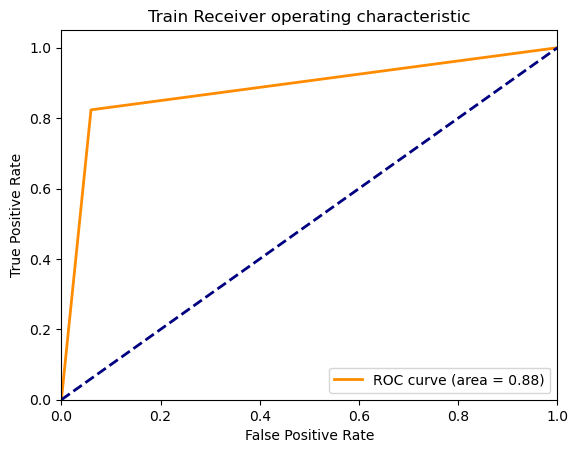

Test Area under the curve


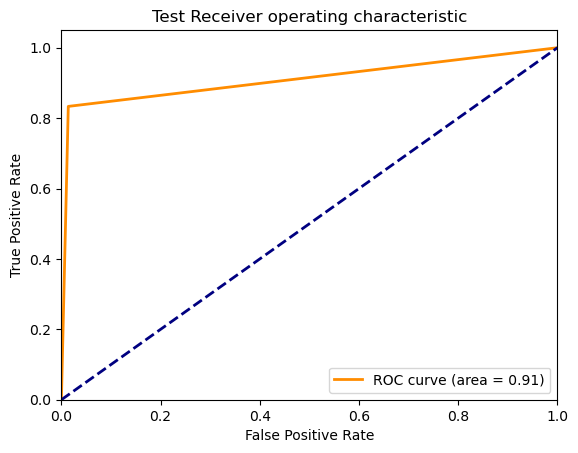

Train confusion matrix
[[268  17]
 [ 30 140]]
Test confusion matrix
[[71  1]
 [ 7 35]]
Average Train Accuracy: 0.9115018315018317
Average Train Recall: 0.8317647058823532
Average Train Precision: 0.9242803190017228
Average Train f1: 0.8753961388832302
Average Train AUC: 0.8954145166838664
-------------------------------------
Average Test Accuracy: 0.9070175438596494
Average Test Recall: 0.8079365079365076
Average Test Precision: 0.931113012134684
Average Test f1: 0.8644521911301314
Average Test AUC: 0.8863756613756613


In [ ]:
train_accuracy = 0
train_f1 = 0
train_recall = 0
train_auc = 0
train_precision = 0
test_accuracy = 0
test_f1 = 0
test_recall = 0
test_auc = 0
test_precision = 0

for m in range(30):
    print('Iteration',m)
    train_df_x, test_df_x, train_df_y, test_df_y = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y)
    min_max_scaler = preprocessing.StandardScaler().fit(train_df_x)
    train_df_x_standardized =  pd.DataFrame(min_max_scaler.transform(train_df_x)).reset_index(drop=True)
    test_df_x_standardized = pd.DataFrame(min_max_scaler.transform(test_df_x)).reset_index(drop=True)

    kmeans = KMeans(n_clusters=2,init='k-means++',n_init=5)
    kmeans.fit(train_df_x_standardized)
    cluster_0_closest_30=np.argsort(kmeans.transform(train_df_x_standardized)[:, 1])[::-1][:30]
    cluster_1_closest_30=np.argsort(kmeans.transform(train_df_x_standardized)[:, 0])[::-1][:30]
    count_0=0
    count_1=0
    for i in cluster_0_closest_30:
        if (train_df_y.iloc[i] == 0):
            count_0+=1
        else:
            count_1+=1
    if count_0>count_1:
        cluster_0_pred = 0
    else:
        cluster_0_pred = 1
    count_0=0
    count_1=0
    for i in cluster_1_closest_30:
        if (train_df_y.iloc[i] == 0):
            count_0+=1
        else:
            count_1+=1
    if count_0>count_1:
        cluster_1_pred = 0
    else:
        cluster_1_pred = 1
    train_clusters = kmeans.predict(train_df_x_standardized)
    train_pred = []
    for i in train_clusters:
        if i==0:
            train_pred.append(cluster_0_pred)
        else:
            train_pred.append(cluster_1_pred)
    test_clusters = kmeans.predict(test_df_x_standardized)
    test_pred = []
    for i in test_clusters:
        if i==0:
            test_pred.append(cluster_0_pred)
        else:
            test_pred.append(cluster_1_pred)

    train_accuracy+=accuracy_score(train_df_y,train_pred)
    fpr_train, tpr_train, _ = roc_curve(train_df_y,train_pred)
    train_recall+=recall_score(train_df_y,train_pred)
    train_precision+=precision_score(train_df_y,train_pred)
    train_f1+=f1_score(train_df_y,train_pred)
    train_auc+=auc(fpr_train,tpr_train)

    test_accuracy+=accuracy_score(test_df_y,test_pred)
    fpr_test, tpr_test, _ = roc_curve(test_df_y,test_pred)
    test_recall+=recall_score(test_df_y,test_pred)
    test_precision+=precision_score(test_df_y,test_pred)
    test_f1+=f1_score(test_df_y,test_pred)
    test_auc+=auc(fpr_test,tpr_test)

    if m==29:
        print("Train Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_train, tpr_train, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Train Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Test Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_test, tpr_test, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_test, tpr_test))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        train_cm = confusion_matrix(train_df_y, train_pred)
        test_cm = confusion_matrix(test_df_y, test_pred)
        print('Train confusion matrix')
        print(train_cm)
        print('Test confusion matrix')
        print(test_cm)

print("Average Train Accuracy:", train_accuracy/30)
print("Average Train Recall:", train_recall/30)
print("Average Train Precision:", train_precision/30)
print("Average Train f1:", train_f1/30)
print("Average Train AUC:", train_auc/30)
print("-------------------------------------")
print("Average Test Accuracy:", test_accuracy/30)
print("Average Test Recall:", test_recall/30)
print("Average Test Precision:", test_precision/30)
print("Average Test f1:", test_f1/30)
print("Average Test AUC:", test_auc/30)

#### (iv) Spectral Clustering

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Train Area under the curve


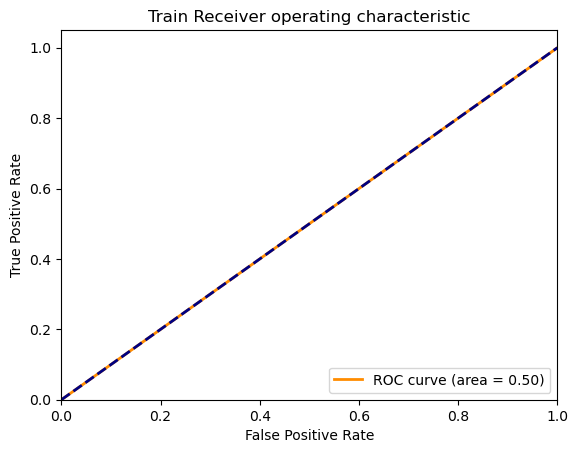

Test Area under the curve


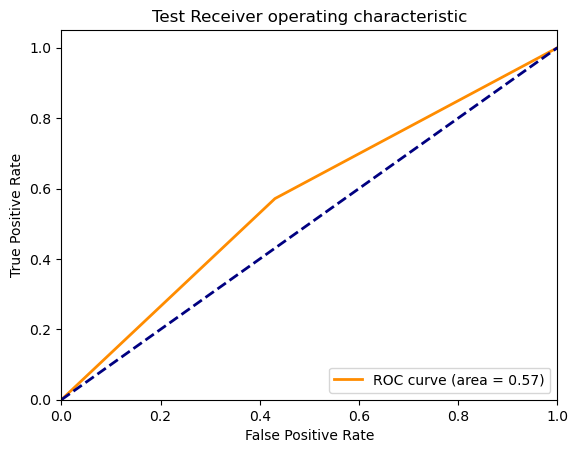

Train confusion matrix
[[  0 285]
 [  0 170]]
Test confusion matrix
[[41 31]
 [18 24]]
Average Train Accuracy: 0.457875457875458
Average Train Recall: 0.6666666666666666
Average Train Precision: 0.2490842490842492
Average Train f1: 0.36266666666666686
Average Train AUC: 0.5
-------------------------------------
Average Test Accuracy: 0.5415204678362573
Average Test Recall: 0.33015873015873015
Average Test Precision: 0.24403919625827342
Average Test f1: 0.28023304552325357
Average Test AUC: 0.4974867724867725


In [ ]:
train_accuracy = 0
train_f1 = 0
train_recall = 0
train_auc = 0
train_precision = 0
test_accuracy = 0
test_f1 = 0
test_recall = 0
test_auc = 0
test_precision = 0

for m in range(30):
    print('Iteration',m)
    train_df_x, test_df_x, train_df_y, test_df_y = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y)
    spectral = SpectralClustering(assign_labels='discretize', n_clusters=2, affinity='rbf',eigen_tol = 1e-2, eigen_solver = 'arpack', random_state=0)
    train_clusters = spectral.fit_predict(train_df_x)
    count_0=0
    count_1=0
    for i in range(len(train_clusters)):
        if train_clusters[i]==1:
            if train_df_y.iloc[i] == 0:
                count_0+=1
            else:
                count_1+=1
    if count_0>count_1:
        cluster_0_pred = 0
    else:
        cluster_0_pred = 1
    count_0=0
    count_1=0
    for i in range(len(train_clusters)):
        if train_clusters[i]==0:
            if train_df_y.iloc[i] == 0:
                count_0+=1
            else:
                count_1+=1
    if count_0>count_1:
        cluster_1_pred = 0
    else:
        cluster_1_pred = 1
    train_pred = []
    for i in train_clusters:
        if i==0:
            train_pred.append(cluster_0_pred)
        else:
            train_pred.append(cluster_1_pred)

    test_clusters = spectral.fit_predict(test_df_x)
    test_pred = []
    for i in test_clusters:
        if i==0:
            test_pred.append(cluster_0_pred)
        else:
            test_pred.append(cluster_1_pred)

    train_accuracy+=accuracy_score(train_df_y,train_pred)
    fpr_train, tpr_train, _ = roc_curve(train_df_y,train_pred)
    train_recall+=recall_score(train_df_y,train_pred)
    train_precision+=precision_score(train_df_y,train_pred)
    train_f1+=f1_score(train_df_y,train_pred)
    train_auc+=auc(fpr_train,tpr_train)

    test_accuracy+=accuracy_score(test_df_y,test_pred)
    fpr_test, tpr_test, _ = roc_curve(test_df_y,test_pred)
    test_recall+=recall_score(test_df_y,test_pred)
    test_precision+=precision_score(test_df_y,test_pred)
    test_f1+=f1_score(test_df_y,test_pred)
    test_auc+=auc(fpr_test,tpr_test)


    if m==29:
        print("Train Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_train, tpr_train, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Train Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Test Area under the curve")
        plt.figure()
        lw=2
        plt.plot(fpr_test, tpr_test, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_test, tpr_test))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        train_cm = confusion_matrix(train_df_y, train_pred)
        test_cm = confusion_matrix(test_df_y, test_pred)
        print('Train confusion matrix')
        print(train_cm)
        print('Test confusion matrix')
        print(test_cm)

print("Average Train Accuracy:", train_accuracy/30)
print("Average Train Recall:", train_recall/30)
print("Average Train Precision:", train_precision/30)
print("Average Train f1:", train_f1/30)
print("Average Train AUC:", train_auc/30)
print("-------------------------------------")
print("Average Test Accuracy:", test_accuracy/30)
print("Average Test Recall:", test_recall/30)
print("Average Test Precision:", test_precision/30)
print("Average Test f1:", test_f1/30)
print("Average Test AUC:", test_auc/30)

#### (iv) Compare

The supervised and semi-supervised algorithms perform better than the unsupervised algorithms. It can also be seen that on the testing data, the supervised algorithm works a little bit better than the semi-supervised algorithm.

This can be accounted to the fact that supervised algorithm has more labels than semi-supervised based on which it can make predictions. Unsupervised algorithm is just making use of similarity between features to make predictions which could possibly be the reason for the poor performance.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [ ]:
bank_df = pd.read_csv('../data/data_banknote_authentication.txt',sep=",",names=['var','skew','curtosis','entropy','class'])

In [ ]:
bank_df

,var,skew,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
bank_y = bank_df['class']
bank_x = bank_df.drop('class',axis=1)

In [ ]:
bank_train_x, bank_test_x, bank_train_y, bank_test_y = train_test_split(bank_x,bank_y,test_size=472)

In [ ]:
bank_train_y = pd.DataFrame(bank_train_y).reset_index(drop=True)
bank_test_y = pd.DataFrame(bank_test_y).reset_index(drop=True)

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [ ]:
passive_test_errors = {}

min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train_x)
bank_train_x_normalized =  pd.DataFrame(min_max_scaler.transform(bank_train_x))
bank_test_x_normalized = pd.DataFrame(min_max_scaler.transform(bank_test_x))

for i in range(10,910,10):
    passive_test_errors[i]=0

for m in range(50):
    print('Iteration',m)
    remaining_train_x = bank_train_x_normalized
    remaining_train_y = bank_train_y
    cur_train_x = pd.DataFrame()
    cur_train_y = pd.DataFrame()
    for i in range(90):
        rand_ten_index = np.random.permutation(remaining_train_x.index)[:10]
        if i==0:
            while (bank_train_y.iloc[rand_ten_index]['class']==1).all() or (bank_train_y.iloc[rand_ten_index]['class']==0).all(): # continue until a suitable sample is found
                rand_ten_index = np.random.permutation(remaining_train_x.index)[:10]
        cur_train_x = pd.concat([cur_train_x,remaining_train_x.iloc[rand_ten_index]])
        cur_train_y = pd.concat([cur_train_y,remaining_train_y.iloc[rand_ten_index]])
        remaining_train_x = remaining_train_x.drop(rand_ten_index).reset_index(drop=True)
        remaining_train_y = remaining_train_y.drop(rand_ten_index).reset_index(drop=True)
        parameters = {'l1svm__C':[10**i for i in np.linspace(-3,6,num=10)]}
        l1svm_pipe = Pipeline([('l1svm', LinearSVC(penalty='l1',max_iter=80000, dual=False))])
        grid_l1svm = GridSearchCV(l1svm_pipe, parameters)
        grid_l1svm.fit(cur_train_x, cur_train_y)
        cur_err = 1-accuracy_score(bank_test_y, grid_l1svm.predict(bank_test_x_normalized))
        passive_test_errors[len(cur_train_x)]+=cur_err
for i in passive_test_errors:
    passive_test_errors[i]=passive_test_errors[i]/50

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49


In [ ]:
passive_test_errors

{10: 0.1382203389830509,
 20: 0.07266949152542372,
 30: 0.051144067796610175,
 40: 0.04817796610169493,
 50: 0.03427966101694917,
 60: 0.03080508474576273,
 70: 0.03224576271186443,
 80: 0.03063559322033899,
 90: 0.025805084745762718,
 100: 0.024618644067796628,
 110: 0.025000000000000026,
 120: 0.024576271186440693,
 130: 0.023220338983050856,
 140: 0.022923728813559335,
 150: 0.021906779661016965,
 160: 0.022669491525423746,
 170: 0.022457627118644092,
 180: 0.020762711864406792,
 190: 0.020211864406779672,
 200: 0.01919491525423729,
 210: 0.0176271186440678,
 220: 0.017711864406779666,
 230: 0.01796610169491526,
 240: 0.018262711864406783,
 250: 0.01741525423728814,
 260: 0.0176271186440678,
 270: 0.01711864406779661,
 280: 0.016355932203389826,
 290: 0.017711864406779663,
 300: 0.01817796610169492,
 310: 0.01813559322033899,
 320: 0.01707627118644068,
 330: 0.016355932203389826,
 340: 0.016313559322033898,
 350: 0.015296610169491518,
 360: 0.015042372881355924,
 370: 0.014872881355

#### (ii) Active

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train_x)
bank_train_x_normalized =  pd.DataFrame(min_max_scaler.transform(bank_train_x))
bank_test_x_normalized = pd.DataFrame(min_max_scaler.transform(bank_test_x))
active_test_errors = {}

for i in range(10,910,10):
    active_test_errors[i]=0

for m in range(50):
    print('Iteration',m)
    remaining_train_x = bank_train_x_normalized
    remaining_train_y = bank_train_y
    cur_train_x = pd.DataFrame()
    cur_train_y = pd.DataFrame()
    for i in range(90):
        if i==0:
            # round 1 with 10 random points
            closest_ten_index = np.random.permutation(remaining_train_x.index)[:10]
            while (bank_train_y.iloc[closest_ten_index]['class']==1).all() or (bank_train_y.iloc[closest_ten_index]['class']==0).all(): # continue until a suitable sample is found
                closest_ten_index = np.random.permutation(remaining_train_x.index)[:10]
        else:
            closest_ten_index = np.abs(grid_l1svm.decision_function(remaining_train_x)).argsort()[:10]
        cur_train_x = pd.concat([cur_train_x,remaining_train_x.iloc[closest_ten_index]])
        cur_train_y = pd.concat([cur_train_y,remaining_train_y.iloc[closest_ten_index]])
        remaining_train_x = remaining_train_x.drop(closest_ten_index).reset_index(drop=True)
        remaining_train_y = remaining_train_y.drop(closest_ten_index).reset_index(drop=True)
        parameters = {'l1svm__C':[10**i for i in np.linspace(-3,6,num=10)]}
        l1svm_pipe = Pipeline([('l1svm', LinearSVC(penalty='l1',max_iter=80000, dual=False))])
        grid_l1svm = GridSearchCV(l1svm_pipe, parameters)
        grid_l1svm.fit(cur_train_x, cur_train_y)
        cur_err = 1-accuracy_score(bank_test_y,grid_l1svm.predict(bank_test_x_normalized))
        active_test_errors[len(cur_train_x)]+=cur_err
for i in active_test_errors:
    active_test_errors[i]/=50

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49


In [ ]:
active_test_errors

{10: 0.18483050847457627,
 20: 0.0664830508474576,
 30: 0.0397457627118644,
 40: 0.023177966101694904,
 50: 0.016271186440677946,
 60: 0.013347457627118621,
 70: 0.011949152542372853,
 80: 0.014110169491525397,
 90: 0.01076271186440675,
 100: 0.010635593220338954,
 110: 0.010635593220338954,
 120: 0.010635593220338954,
 130: 0.011186440677966076,
 140: 0.010932203389830482,
 150: 0.012203389830508456,
 160: 0.012966101694915239,
 170: 0.012711864406779644,
 180: 0.013093220338983035,
 190: 0.013305084745762698,
 200: 0.014449152542372874,
 210: 0.01610169491525424,
 220: 0.016483050847457634,
 230: 0.016525423728813566,
 240: 0.01796610169491527,
 250: 0.01779661016949154,
 260: 0.01847457627118646,
 270: 0.02004237288135596,
 280: 0.019745762711864435,
 290: 0.020000000000000028,
 300: 0.019745762711864435,
 310: 0.020762711864406817,
 320: 0.021271186440678002,
 330: 0.020254237288135624,
 340: 0.021271186440678002,
 350: 0.021271186440678002,
 360: 0.02076271186440681,
 370: 0.01949

### (c) Average the 50 test errors

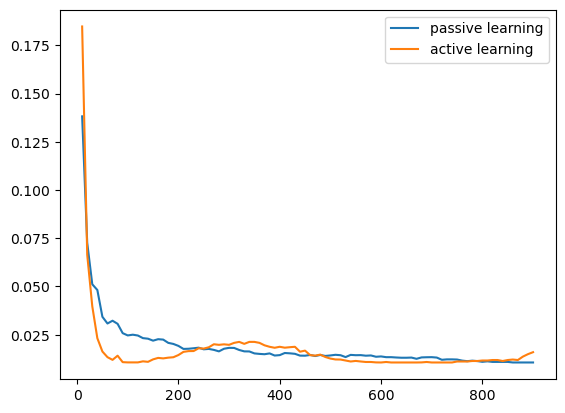

In [ ]:
import matplotlib.pyplot as plt
plt.plot(passive_test_errors.keys(), passive_test_errors.values(), label = "passive learning")
plt.plot(active_test_errors.keys(), active_test_errors.values(), label = "active learning")
plt.legend()
plt.show()

For a small sample size (until ~220), the average test error for active learning is smaller than the average test error for passive learning. As the sample size increases, the difference in average test errors for passive learning and active learning becomes minute.